**PREDICTING DATA**


**IMPORTING LIBRARIES**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

**LOAD AND REVIEW DATA**

In [6]:
df = pd.read_csv(r"C:\Users\kavya saxena\Desktop\MachineLearningWithPython-master\Notebooks\data\pima-data.csv")

In [7]:
df.shape

(768, 10)

In [8]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [9]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [10]:
df.isnull().values.any()

False

In [11]:
def plot_corr(df, size=11):
 corr = df.corr()
 fig, ax = plt.subplots(figsize=(size,size))
 ax.matshow(corr)
 plt.xticks(range(len(corr.columns)),corr.columns)
 plt.yticks(range(len(corr.columns)),corr.columns)

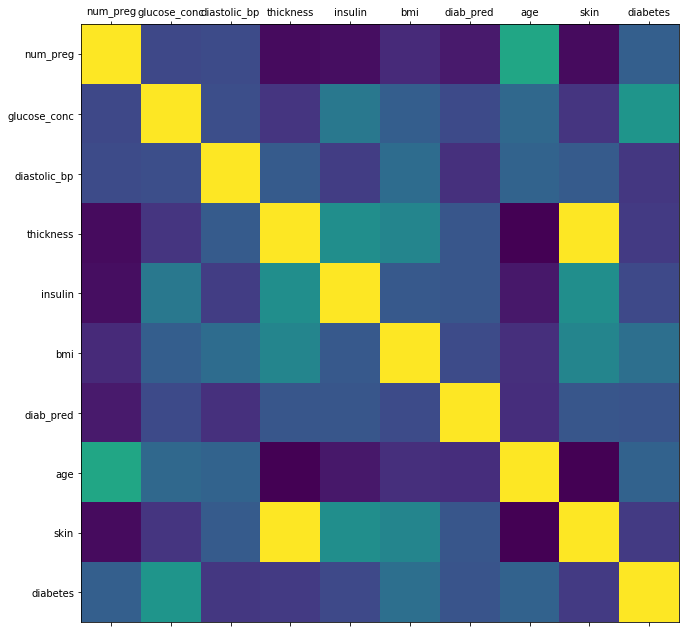

In [12]:
plot_corr(df)

In [13]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [14]:
del df['skin']

In [15]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


## Check data type

In [16]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


change true to 1, false to 0

In [17]:
diabetes_map = {True:1, False: 0}

In [18]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [19]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


check true/false ratio

In [20]:
num_true = len(df.loc[df['diabetes']== True])
num_false = len(df.loc[df['diabetes']== False])
print("percentage of true: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true + num_false))*100))
print("percentage of true: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true + num_false))*100))

percentage of true: 268 (34.90%)
percentage of true: 500 (65.10%)


splitting the data
70% training, 30% test

In [21]:
from sklearn.model_selection import train_test_split
feature_col_names = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred', 'age']
predicted_class_names = ['diabetes']

x = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = split_test_size, random_state=42)

In [22]:
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


**Verifying predicted value was split correctly**

In [36]:
print("Original True : {0} ({1:0.2f}%)".format((len(df.loc[df['diabetes']==1])),(len(df.loc[df['diabetes']==1]))/len(df.index)*100))
print("Original False : {0} ({1:0.2f}%)".format((len(df.loc[df['diabetes']==0])),(len(df.loc[df['diabetes']==0]))/len(df.index)*100))
print(" ")
print("Training True : {0} ({1:0.2f}%)".format((len(y_train[y_train[:]==1])),(len(y_train[y_train[:]==1]))/len(y_train)*100))
print("Training False : {0} ({1:0.2f}%)".format((len(y_train[y_train[:]==0])),(len(y_train[y_train[:]==0]))/len(y_train)*100))
print(" ")
print("Test True : {0} ({1:0.2f}%)".format((len(y_test[y_test[:]==1])),(len(y_test[y_test[:]==1]))/len(y_test)*100))
print("Test True : {0} ({1:0.2f}%)".format((len(y_test[y_test[:]==0])),(len(y_test[y_test[:]==0]))/len(y_test)*100))

Original True : 268 (34.90%)
Original False : 500 (65.10%)
 
Training True : 188 (35.01%)
Training False : 349 (64.99%)
 
Test True : 80 (34.63%)
Test True : 151 (65.37%)


**Post split data preparation**

hidden missing values

In [37]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Are these 0 values possible?
How many rows have unexpected 0 value?

In [39]:
print("# rows in dataframes {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc']== 0] )))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframes 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


Impute with the mean 

In [42]:
from sklearn.impute import SimpleImputer
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)
x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

C:\Users\kavya saxena\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [43]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
nb_predict_train = nb_model.predict(x_train)
from sklearn import metrics
print("Accuracy : ({0:.4f}%)".format(metrics.accuracy_score(y_train,nb_predict_train)))
print()

Accuracy : (0.7542%)



Performance on testing data

In [47]:
nb_predict_test = nb_model.predict(x_test)
from sklearn import metrics
print("Accuracy : ({0:.4f}%)".format(metrics.accuracy_score(y_test,nb_predict_test)))
print()

Accuracy : (0.7359%)



In [48]:
print("confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("classification matrix")
print(metrics.classification_report(y_test, nb_predict_test))

confusion matrix
[[118  33]
 [ 28  52]]

classification matrix
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

   micro avg       0.74      0.74      0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state= 42)
rf_model.fit(x_train, y_train.ravel())

C:\Users\kavya saxena\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [50]:
rf_predict_train = rf_model.predict(x_train)
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_train,rf_predict_train)))
print()

Accuracy: 0.9870



In [51]:
rf_predict_test = rf_model.predict(x_test)
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test,rf_predict_test)))
print()

Accuracy: 0.7100



In [52]:
print("confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")

print("classification matrix")
print(metrics.classification_report(y_test, rf_predict_test))

confusion matrix
[[121  30]
 [ 37  43]]

classification matrix
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       151
           1       0.59      0.54      0.56        80

   micro avg       0.71      0.71      0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231



Setting regularization parameter

In [57]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.7, random_state = 42)
lr_model.fit(x_train,y_train.ravel())
lr_predict_test = lr_model.predict(x_test)
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")

print("classification matrix")
print(metrics.classification_report(y_test, lr_predict_test))
    

Accuracy: 0.7446
confusion matrix
[[128  23]
 [ 36  44]]

classification matrix
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

   micro avg       0.74      0.74      0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



C:\Users\kavya saxena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\kavya saxena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavya saxena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavya saxena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavya saxena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavya saxena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

1st max value of 0.613 occured at c = 1.400


C:\Users\kavya saxena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavya saxena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavya saxena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavya saxena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavya saxena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

Text(0, 0.5, 'recall_scores')

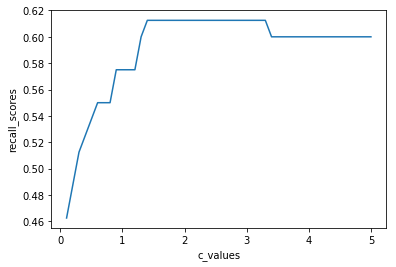

In [67]:
c_start = 0.1
c_end = 5
c_inc = 0.1
c_values, recall_scores = [], []
c_val = c_start
best_recall_score = 0
while(c_val < c_end):
    c_values.append(c_val)
    lr_model_loop = LogisticRegression(C=c_val, random_state = 42)
    lr_model_loop.fit(x_train,y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    c_val = c_val + c_inc
best_score_c_val = c_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:0.3f} occured at c = {1:.3f}".format(best_recall_score, best_score_c_val))
%matplotlib inline
plt.plot(c_values, recall_scores, "-")
plt.xlabel("c_values")
plt.ylabel("recall_scores")

**Now with balanced data**

C:\Users\kavya saxena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavya saxena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavya saxena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavya saxena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavya saxena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

1st max value of 0.738 occured at c = 0.300


Text(0, 0.5, 'recall_scores')

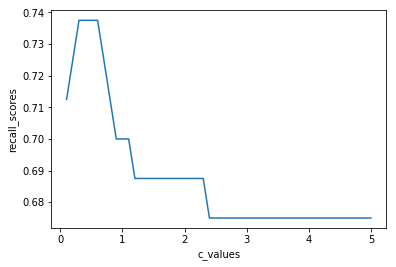

In [68]:
c_start = 0.1
c_end = 5
c_inc = 0.1
c_values, recall_scores = [], []
c_val = c_start
best_recall_score = 0
while(c_val < c_end):
    c_values.append(c_val)
    lr_model_loop = LogisticRegression(C=c_val, class_weight = 'balanced', random_state = 42)
    lr_model_loop.fit(x_train,y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    c_val = c_val + c_inc
best_score_c_val = c_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:0.3f} occured at c = {1:.3f}".format(best_recall_score, best_score_c_val))
%matplotlib inline
plt.plot(c_values, recall_scores, "-")
plt.xlabel("c_values")
plt.ylabel("recall_scores")

In [69]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=best_score_c_val, class_weight = 'balanced', random_state = 42)
lr_model.fit(x_train,y_train.ravel())
lr_predict_test = lr_model.predict(x_test)
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")

print("classification matrix")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7143
confusion matrix
[[106  45]
 [ 21  59]]

classification matrix
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.57      0.74      0.64        80

   micro avg       0.71      0.71      0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231



C:\Users\kavya saxena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
